### Importación de datos



In [167]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300","6,900",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,5,-74
1,Mesa de comedor,Muebles,"192,300","8,400",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6,-76
2,Juego de mesa,Juguetes,"209,600","15,900",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10,-76
3,Microondas,Electrodomésticos,"757,500","41,000",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3,-77
4,Silla de oficina,Muebles,"335,200","20,200",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6,-76


#1. Análisis de facturación



## Cálculo de ingreso total: identificando columnas por base de datos, tipo de dato y generación de dataframe

### Tienda 1:

In [168]:
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [169]:
tienda["Precio"].dtype

dtype('float64')

In [170]:
ing_tot1 = tienda["Precio"].sum()
ing_tot1

np.float64(1150880400.0)

In [171]:
df_ing_tot1 = pd.DataFrame({
    "Tienda": ["Tienda 1"],
    "Ingreso Total": [ing_tot1]})

df_ing_tot1

,Tienda,Ingreso Total
0,Tienda 1,"1,150,880,400"


### Tienda 2:

In [172]:
tienda2.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [173]:
tienda["Precio"].dtype

dtype('float64')

In [174]:
ing_tot2 = tienda2["Precio"].sum()
ing_tot2

np.float64(1116343500.0)

In [175]:
df_ing_tot2 = pd.DataFrame({
    "Tienda": ["Tienda 2"],
    "Ingreso Total": [ing_tot2]})

df_ing_tot2

,Tienda,Ingreso Total
0,Tienda 2,"1,116,343,500"


### Tienda 3:

In [176]:
tienda3.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [177]:
tienda["Precio"].dtype

dtype('float64')

In [178]:
ing_tot3 = tienda3["Precio"].sum()
ing_tot3

np.float64(1098019600.0)

In [179]:
df_ing_tot3 = pd.DataFrame({
    "Tienda": ["Tienda 3"],
    "Ingreso Total": [ing_tot3]})

df_ing_tot3

,Tienda,Ingreso Total
0,Tienda 3,"1,098,019,600"


### Tienda 4:

In [180]:
tienda3.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [181]:
tienda["Precio"].dtype

dtype('float64')

In [182]:
ing_tot4 = tienda4["Precio"].sum()
ing_tot4

np.float64(1038375700.0)

In [183]:
df_ing_tot4 = pd.DataFrame({
    "Tienda": ["Tienda 4"],
    "Ingreso Total": [ing_tot4]})

df_ing_tot4

,Tienda,Ingreso Total
0,Tienda 4,"1,038,375,700"


## Ingresos totales por tienda

In [184]:
df_ingresos_totales = pd.concat([df_ing_tot1, df_ing_tot2, df_ing_tot3, df_ing_tot4], ignore_index=True)
df_ingresos_totales


,Tienda,Ingreso Total
0,Tienda 1,"1,150,880,400"
1,Tienda 2,"1,116,343,500"
2,Tienda 3,"1,098,019,600"
3,Tienda 4,"1,038,375,700"


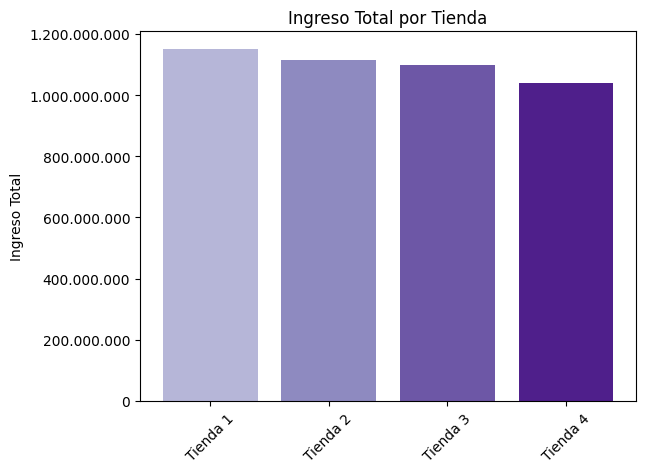

In [241]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

tiendas = df_ingresos_totales["Tienda"]
ingresos = df_ingresos_totales["Ingreso Total"]

n = len(tiendas)

colors = plt.cm.Purples(np.linspace(0.4, 0.9, n))

fig, ax = plt.subplots()

ax.bar(tiendas, ingresos, color=colors)

ax.set_ylabel('Ingreso Total')
ax.set_title('Ingreso Total por Tienda')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x:,.0f}".replace(",", ".")))

plt.xticks(rotation=45)

plt.show()

# 2. Ventas por categoría: identificación de categorias por base de datos, agrupación y dataframe

### Tienda 1:

In [185]:
tienda["Categoría del Producto"].unique()

array(['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos',
       'Artículos para el hogar', 'Deportes y diversión', 'Libros',
       'Instrumentos musicales'], dtype=object)

In [245]:
ventas_categorias1 = tienda.groupby("Categoría del Producto")["Categoría del Producto"].count().sort_values(ascending=False)
ventas_categorias1

,Categoría del Producto
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


In [187]:
df_ventas_categorias1 = (
    ventas_categorias1
    .reset_index(name="Cantidad Vendida")
)
df_ventas_categorias1

,Categoría del Producto,Cantidad Vendida
0,Muebles,465
1,Electrónicos,448
2,Juguetes,324
3,Electrodomésticos,312
4,Deportes y diversión,284
5,Instrumentos musicales,182
6,Libros,173
7,Artículos para el hogar,171


### Tienda 2:

In [188]:
tienda2["Categoría del Producto"].unique()

array(['Muebles', 'Instrumentos musicales', 'Deportes y diversión',
       'Electrónicos', 'Artículos para el hogar', 'Juguetes',
       'Electrodomésticos', 'Libros'], dtype=object)

In [189]:
ventas_categorias2 = tienda2.groupby("Categoría del Producto")["Categoría del Producto"].count().sort_values(ascending=False)
ventas_categorias2

,Categoría del Producto
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181


In [190]:
df_ventas_categorias2 = (
    ventas_categorias2
    .reset_index(name="Cantidad Vendida")
)
df_ventas_categorias2

,Categoría del Producto,Cantidad Vendida
0,Muebles,442
1,Electrónicos,422
2,Juguetes,313
3,Electrodomésticos,305
4,Deportes y diversión,275
5,Instrumentos musicales,224
6,Libros,197
7,Artículos para el hogar,181


### Tienda 3

In [191]:
tienda3["Categoría del Producto"].unique()

array(['Electrodomésticos', 'Muebles', 'Instrumentos musicales',
       'Deportes y diversión', 'Electrónicos', 'Juguetes',
       'Artículos para el hogar', 'Libros'], dtype=object)

In [192]:
ventas_categorias3 = tienda3.groupby("Categoría del Producto")["Categoría del Producto"].count().sort_values(ascending=False)
ventas_categorias3

,Categoría del Producto
Categoría del Producto,
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277
Libros,185
Artículos para el hogar,177
Instrumentos musicales,177


In [193]:
df_ventas_categorias3 = (
    ventas_categorias3
    .reset_index(name="Cantidad Vendida")
)
df_ventas_categorias3

,Categoría del Producto,Cantidad Vendida
0,Muebles,499
1,Electrónicos,451
2,Juguetes,315
3,Electrodomésticos,278
4,Deportes y diversión,277
5,Libros,185
6,Artículos para el hogar,177
7,Instrumentos musicales,177


### Tienda 4:

In [194]:
tienda3["Categoría del Producto"].unique()

array(['Electrodomésticos', 'Muebles', 'Instrumentos musicales',
       'Deportes y diversión', 'Electrónicos', 'Juguetes',
       'Artículos para el hogar', 'Libros'], dtype=object)

In [195]:
ventas_categorias4 = tienda4.groupby("Categoría del Producto")["Categoría del Producto"].count().sort_values(ascending=False)
ventas_categorias4

,Categoría del Producto
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


In [196]:
df_ventas_categorias4 = (
    ventas_categorias4
    .reset_index(name="Cantidad Vendida")
)
df_ventas_categorias4

,Categoría del Producto,Cantidad Vendida
0,Muebles,480
1,Electrónicos,451
2,Juguetes,338
3,Deportes y diversión,277
4,Electrodomésticos,254
5,Artículos para el hogar,201
6,Libros,187
7,Instrumentos musicales,170


### Visualización por categorías

In [248]:
df_ventas_categorias1["Tienda"] = "Tienda 1"
df_ventas_categorias2["Tienda"] = "Tienda 2"
df_ventas_categorias3["Tienda"] = "Tienda 3"
df_ventas_categorias4["Tienda"] = "Tienda 4"


In [249]:
df_cat_tiendas = pd.concat([
    df_ventas_categorias1,
    df_ventas_categorias2,
    df_ventas_categorias3,
    df_ventas_categorias4
])
df_cat_tiendas

,Categoría del Producto,Cantidad Vendida,Tienda
0,Muebles,465,Tienda 1
1,Electrónicos,448,Tienda 1
2,Juguetes,324,Tienda 1
3,Electrodomésticos,312,Tienda 1
4,Deportes y diversión,284,Tienda 1
5,Instrumentos musicales,182,Tienda 1
6,Libros,173,Tienda 1
7,Artículos para el hogar,171,Tienda 1
0,Muebles,442,Tienda 2
1,Electrónicos,422,Tienda 2


In [253]:
tabla_cat_tiendas = df_cat_tiendas.pivot(
    index="Categoría del Producto",
    columns="Tienda",
    values="Cantidad Vendida"
)

tabla_cat_tiendas

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


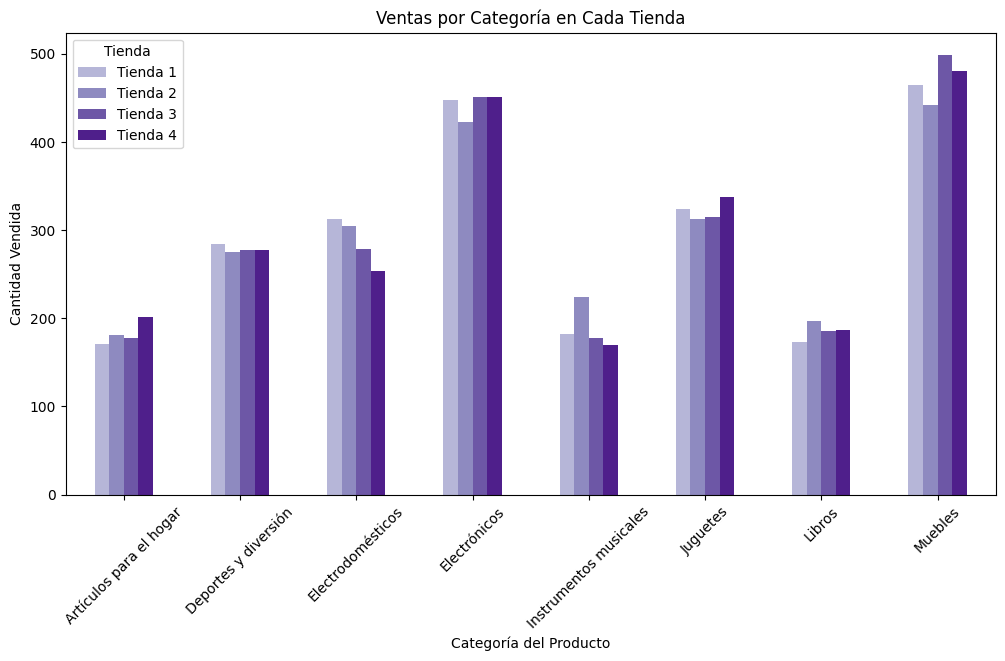

In [256]:
import numpy as np
import matplotlib.pyplot as plt

n_tiendas = len(tabla_cat_tiendas.columns)
colors = plt.cm.Purples( np.linspace(0.4, 0.9, n_tiendas) )

ax = tabla_cat_tiendas.plot(
    kind="bar",
    figsize=(12,6),
    color=colors
)

ax.set_title("Ventas por Categoría en Cada Tienda")
ax.set_xlabel("Categoría del Producto")
ax.set_ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.legend(title="Tienda")

plt.show()



# 3. Calificación promedio de la tienda


### Tienda 1

In [197]:
promedio_calificacion1 = tienda["Calificación"].mean()
promedio_calificacion1

np.float64(3.976685036032217)

In [198]:
df_promedio_calificacion1 = pd.DataFrame({
    "Tienda": ["Tienda 1"],
    "Promedio Calificación": [promedio_calificacion1]
})

df_promedio_calificacion1


,Tienda,Promedio Calificación
0,Tienda 1,4


## Tienda 2

In [199]:
promedio_calificacion2 = tienda2["Calificación"].mean()
promedio_calificacion2

np.float64(4.037303942348453)

In [200]:
df_promedio_calificacion2 = pd.DataFrame({
    "Tienda": ["Tienda 2"],
    "Promedio Calificación": [promedio_calificacion2]
})

df_promedio_calificacion2

,Tienda,Promedio Calificación
0,Tienda 2,4


## Tienda 3

In [201]:
promedio_calificacion3 = tienda3["Calificación"].mean()
promedio_calificacion3

np.float64(4.048325561678677)

In [202]:
df_promedio_calificacion3 = pd.DataFrame({
    "Tienda": ["Tienda 3"],
    "Promedio Calificación": [promedio_calificacion3]
})

df_promedio_calificacion3


,Tienda,Promedio Calificación
0,Tienda 3,4


## Tienda 4:

In [203]:
promedio_calificacion4 = tienda4["Calificación"].mean()
promedio_calificacion4

np.float64(3.9957591178965224)

In [204]:
df_promedio_calificacion4 = pd.DataFrame({
    "Tienda": ["Tienda 4"],
    "Promedio Calificación": [promedio_calificacion4]
})

df_promedio_calificacion4


,Tienda,Promedio Calificación
0,Tienda 4,4


### Calificación por tiendas

In [205]:
df_calificacion_tiendas = pd.concat([df_promedio_calificacion1, df_promedio_calificacion2, df_promedio_calificacion3, df_promedio_calificacion4], ignore_index=True)
df_calificacion_tiendas


,Tienda,Promedio Calificación
0,Tienda 1,4
1,Tienda 2,4
2,Tienda 3,4
3,Tienda 4,4


### Las calificaciones por tienda, no difieren de manera significativa, por lo que no es un factor de peso a considerar en la decisión final

# 4. Productos más y menos vendidos

## Tienda 1

In [206]:
tienda["Producto"].unique()

array(['Asistente virtual', 'Mesa de comedor', 'Juego de mesa',
       'Microondas', 'Silla de oficina', 'Bloques de construcción',
       'Muñeca bebé', 'Lavavajillas', 'Lavadora de ropa',
       'Carrito de control remoto', 'Refrigerador', 'Auriculares',
       'Olla de presión', 'Bicicleta', 'Ciencia de datos con Python',
       'Balón de voleibol', 'Ajedrez de madera', 'TV LED UHD 4K',
       'Vaso térmico', 'Kit de bancas', 'Dashboards con Power BI',
       'Cubertería', 'Set de ollas', 'Batería', 'Cuerda para saltar',
       'Estufa', 'Cama box', 'Impresora', 'Mesa de noche', 'Armario',
       'Dinosaurio Rex', 'Guitarra eléctrica', 'Secadora de ropa',
       'Sofá reclinable', 'Tablet ABXY', 'Cubo mágico 8x8',
       'Set de vasos', 'Modelado predictivo', 'Iphone 15', 'Mochila',
       'Balón de baloncesto', 'Auriculares con micrófono', 'Sillón',
       'Guitarra acústica', 'Iniciando en programación', 'Celular ABXY',
       'Smartwatch', 'Mesa de centro', 'Cama king', 'Smart TV

### Productos más vendidos

In [207]:
ventas_productos1 = tienda.groupby("Producto")["Producto"].count().sort_values(ascending=False)
top_5_ventas_productos1 = ventas_productos1.head()
top_5_ventas_productos1

,Producto
Producto,
Armario,60
TV LED UHD 4K,60
Microondas,60
Secadora de ropa,58
Mesa de noche,56


In [208]:
df_top_5_productos1 = (
    top_5_ventas_productos1
    .reset_index(name="Cantidad Vendida")
)

df_top_5_productos1

,Producto,Cantidad Vendida
0,Armario,60
1,TV LED UHD 4K,60
2,Microondas,60
3,Secadora de ropa,58
4,Mesa de noche,56


In [238]:
ventas_productos1 = df_top_5_productos1.merge(
    tienda[["Producto", "Precio"]].drop_duplicates("Producto"),
    on="Producto",
    how="left"
)
ventas_productos1.head()

,Producto,Cantidad Vendida,Precio
0,Armario,60,"513,400"
1,TV LED UHD 4K,60,"1,891,700"
2,Microondas,60,"757,500"
3,Secadora de ropa,58,"739,700"
4,Mesa de noche,56,"305,400"


### Productos menos vendidos

In [209]:
tail_5_ventas_productos1 = ventas_productos1.tail().sort_values()
tail_5_ventas_productos1

,Producto
Producto,
Celular ABXY,33
Auriculares con micrófono,33
Olla de presión,35
Pandereta,36
Mochila,39


In [210]:
df_tail_5_productos1 = (
    tail_5_ventas_productos1
    .reset_index(name="Cantidad Vendida")
)

df_tail_5_productos1


,Producto,Cantidad Vendida
0,Celular ABXY,33
1,Auriculares con micrófono,33
2,Olla de presión,35
3,Pandereta,36
4,Mochila,39


## Tienda 2

In [211]:
tienda2["Producto"].unique()

array(['Silla de oficina', 'Pandereta', 'Cama king', 'Guitarra acústica',
       'Mochila', 'Tablet ABXY', 'Olla de presión', 'Cubo mágico 8x8',
       'Secadora de ropa', 'Juego de mesa', 'Ajedrez de madera',
       'Bicicleta', 'Modelado predictivo', 'Dashboards con Power BI',
       'Cuerda para saltar', 'Set de vasos', 'Muñeca bebé',
       'Ciencia de datos con Python', 'Lavavajillas',
       'Bloques de construcción', 'Vaso térmico', 'Cubertería', 'Estufa',
       'Set de ollas', 'TV LED UHD 4K', 'Sillón', 'Guitarra eléctrica',
       'Auriculares con micrófono', 'Dinosaurio Rex', 'Smart TV',
       'Armario', 'Refrigerador', 'Mesa de centro', 'Lavadora de ropa',
       'Batería', 'Celular ABXY', 'Balón de baloncesto',
       'Mesa de comedor', 'Kit de bancas', 'Cama box',
       'Balón de voleibol', 'Asistente virtual', 'Sofá reclinable',
       'Carrito de control remoto', 'Auriculares', 'Microondas',
       'Smartwatch', 'Iniciando en programación', 'Mesa de noche',
       'Im

### Productos más vendidos

In [212]:
ventas_productos2 = tienda2.groupby("Producto")["Producto"].count().sort_values(ascending=False)
top_5_ventas_productos2 = ventas_productos2.head()
top_5_ventas_productos2

,Producto
Producto,
Iniciando en programación,65
Microondas,62
Batería,61
Pandereta,58
Guitarra acústica,58


In [213]:
df_top_5_productos2 = (
    top_5_ventas_productos2
    .reset_index(name="Cantidad Vendida")
)

df_top_5_productos2


,Producto,Cantidad Vendida
0,Iniciando en programación,65
1,Microondas,62
2,Batería,61
3,Pandereta,58
4,Guitarra acústica,58


In [257]:
ventas_productos2 = df_top_5_productos2.merge(
    tienda[["Producto", "Precio"]].drop_duplicates("Producto"),
    on="Producto",
    how="left"
)
ventas_productos2.head()

,Producto,Cantidad Vendida,Precio
0,Iniciando en programación,65,"49,400"
1,Microondas,62,"757,500"
2,Batería,61,"583,900"
3,Pandereta,58,"87,700"
4,Guitarra acústica,58,"434,600"


### Productos menos vendidos

In [214]:
tail_5_ventas_productos2 = ventas_productos2.tail().sort_values()
tail_5_ventas_productos2

,Producto
Producto,
Juego de mesa,32
Mesa de comedor,34
Impresora,34
Sillón,35
Auriculares,37


In [215]:
df_tail_5_productos2 = (
    tail_5_ventas_productos2
    .reset_index(name="Cantidad Vendida")
)

df_tail_5_productos2

,Producto,Cantidad Vendida
0,Juego de mesa,32
1,Mesa de comedor,34
2,Impresora,34
3,Sillón,35
4,Auriculares,37


## Tienda 3

In [258]:
tienda3["Producto"].unique()

array(['Secadora de ropa', 'Mesa de noche', 'Guitarra acústica',
       'Balón de voleibol', 'Armario', 'Impresora',
       'Carrito de control remoto', 'Silla de oficina', 'Pandereta',
       'Cubertería', 'Muñeca bebé', 'Auriculares', 'Set de vasos',
       'TV LED UHD 4K', 'Olla de presión', 'Lavadora de ropa',
       'Set de ollas', 'Dinosaurio Rex', 'Modelado predictivo',
       'Mesa de comedor', 'Dashboards con Power BI', 'Kit de bancas',
       'Cuerda para saltar', 'Iniciando en programación',
       'Balón de baloncesto', 'Estufa', 'Bicicleta', 'Lavavajillas',
       'Smart TV', 'Mochila', 'Tablet ABXY', 'Mesa de centro', 'Cama box',
       'Ajedrez de madera', 'Iphone 15', 'Cama king', 'Smartwatch',
       'Ciencia de datos con Python', 'Refrigerador',
       'Auriculares con micrófono', 'Juego de mesa', 'Batería',
       'Guitarra eléctrica', 'Sofá reclinable', 'Sillón',
       'Asistente virtual', 'Vaso térmico', 'Celular ABXY', 'Microondas',
       'Cubo mágico 8x8', 'Blo

### Productos más vendidos

In [216]:
ventas_productos3 = tienda3.groupby("Producto")["Producto"].count().sort_values(ascending=False)
top_5_ventas_productos3 = ventas_productos3.head()
top_5_ventas_productos3

,Producto
Producto,
Kit de bancas,57
Mesa de comedor,56
Cama king,56
Set de ollas,55
Mesa de noche,55


In [217]:
df_top_5_productos3 = (
    top_5_ventas_productos3
    .reset_index(name="Cantidad Vendida")
)

df_top_5_productos3

,Producto,Cantidad Vendida
0,Kit de bancas,57
1,Mesa de comedor,56
2,Cama king,56
3,Set de ollas,55
4,Mesa de noche,55


In [259]:
ventas_productos3 = df_top_5_productos3.merge(
    tienda[["Producto", "Precio"]].drop_duplicates("Producto"),
    on="Producto",
    how="left"
)
ventas_productos3.head()

,Producto,Cantidad Vendida,Precio
0,Kit de bancas,57,"293,500"
1,Mesa de comedor,56,"192,300"
2,Cama king,56,"695,100"
3,Set de ollas,55,"139,300"
4,Mesa de noche,55,"305,400"


### Productos menos vendidos

In [218]:
tail_5_ventas_productos3 = ventas_productos3.tail().sort_values()
tail_5_ventas_productos3

,Producto
Producto,
Bloques de construcción,35
Mochila,36
Set de vasos,36
Microondas,36
Guitarra eléctrica,38


In [219]:
df_tail_5_productos3 = (
    tail_5_ventas_productos3
    .reset_index(name="Cantidad Vendida")
)

df_tail_5_productos3

,Producto,Cantidad Vendida
0,Bloques de construcción,35
1,Mochila,36
2,Set de vasos,36
3,Microondas,36
4,Guitarra eléctrica,38


## Tienda 4

In [260]:
tienda4["Producto"].unique()

array(['Lavavajillas', 'Cama box', 'Balón de baloncesto',
       'Modelado predictivo', 'Auriculares', 'Refrigerador',
       'Guitarra eléctrica', 'Auriculares con micrófono', 'Iphone 15',
       'Mesa de noche', 'Muñeca bebé', 'Dashboards con Power BI',
       'Silla de oficina', 'Kit de bancas', 'Impresora', 'Set de vasos',
       'Mesa de comedor', 'Carrito de control remoto',
       'Cuerda para saltar', 'Estufa', 'Cama king', 'Balón de voleibol',
       'Secadora de ropa', 'Dinosaurio Rex', 'TV LED UHD 4K',
       'Vaso térmico', 'Smart TV', 'Mesa de centro', 'Tablet ABXY',
       'Olla de presión', 'Batería', 'Pandereta',
       'Iniciando en programación', 'Juego de mesa', 'Celular ABXY',
       'Cubertería', 'Armario', 'Bloques de construcción', 'Bicicleta',
       'Asistente virtual', 'Set de ollas', 'Guitarra acústica',
       'Ajedrez de madera', 'Microondas', 'Smartwatch', 'Mochila',
       'Lavadora de ropa', 'Ciencia de datos con Python',
       'Cubo mágico 8x8', 'Silló

### Productos más vendidos

In [220]:
ventas_productos4 = tienda4.groupby("Producto")["Producto"].count().sort_values(ascending=False)
top_5_ventas_productos4 = ventas_productos4.head()
top_5_ventas_productos4

,Producto
Producto,
Cama box,62
Cubertería,59
Cama king,56
Dashboards con Power BI,56
Carrito de control remoto,55


In [221]:
df_top_5_productos4 = (
    top_5_ventas_productos4
    .reset_index(name="Cantidad Vendida")
)

df_top_5_productos4

,Producto,Cantidad Vendida
0,Cama box,62
1,Cubertería,59
2,Cama king,56
3,Dashboards con Power BI,56
4,Carrito de control remoto,55


In [261]:
ventas_productos4 = df_top_5_productos4.merge(
    tienda[["Producto", "Precio"]].drop_duplicates("Producto"),
    on="Producto",
    how="left"
)
ventas_productos4.head()

,Producto,Cantidad Vendida,Precio
0,Cama box,62,"331,400"
1,Cubertería,59,"47,900"
2,Cama king,56,"695,100"
3,Dashboards con Power BI,56,"33,500"
4,Carrito de control remoto,55,"75,200"


### Productos menos vendidos

In [222]:
tail_5_ventas_productos4 = ventas_productos4.tail().sort_values()
tail_5_ventas_productos4

,Producto
Producto,
Guitarra eléctrica,33
Armario,34
Guitarra acústica,37
Refrigerador,38
Ciencia de datos con Python,38


In [223]:
df_tail_5_productos4 = (
    tail_5_ventas_productos4
    .reset_index(name="Cantidad Vendida")
)

df_tail_5_productos4

,Producto,Cantidad Vendida
0,Guitarra eléctrica,33
1,Armario,34
2,Guitarra acústica,37
3,Refrigerador,38
4,Ciencia de datos con Python,38


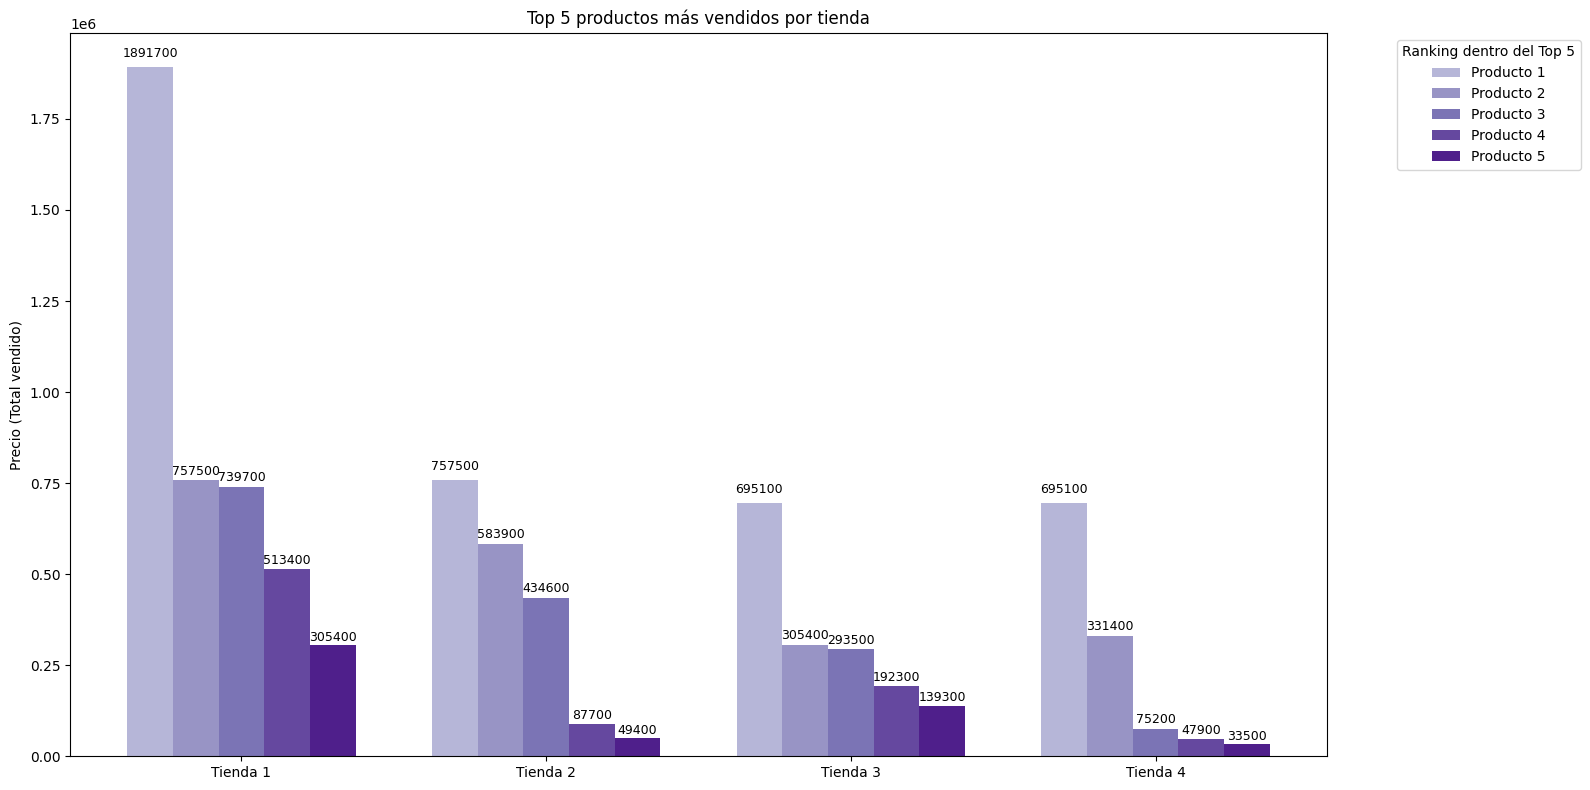

In [266]:
import matplotlib.pyplot as plt
import numpy as np

dfs = [ventas_productos1, ventas_productos2, ventas_productos3, ventas_productos4]
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

n_productos = 5
x = np.arange(len(tiendas))
width = 0.15
colors = plt.cm.Purples(np.linspace(0.4, 0.9, n_productos))

plt.figure(figsize=(16, 8))

for i in range(n_productos):
    precios_i = [dfs[t].sort_values("Precio", ascending=False)["Precio"].iloc[i] for t in range(4)]

    x_positions = x + i * width - (width * (n_productos - 1) / 2)

    plt.bar(
        x_positions,
        precios_i,
        width,
        label=f"Producto {i+1}",
        color=colors[i]
    )

    for xpos, val in zip(x_positions, precios_i):
        plt.text(
            xpos,
            val + max(precios_i)*0.01,
            f"{val:.0f}",
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.xticks(x, tiendas)
plt.ylabel("Precio (Total vendido)")
plt.title("Top 5 productos más vendidos por tienda")
plt.legend(title="Ranking dentro del Top 5", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

## Tienda 1

In [224]:
tienda["Costo de envío"]

,Costo de envío
0,"6,900"
1,"8,400"
2,"15,900"
3,"41,000"
4,"20,200"
...,...
2354,"66,600"
2355,"15,300"
2356,"7,200"
2357,"35,000"


In [225]:
promedio_envio1 = tienda["Costo de envío"].mean()
promedio_envio1

np.float64(26018.60958033065)

In [226]:
df_promedio_envio1 = pd.DataFrame({
    "Tienda": ["Tienda 1"],
    "Promedio Costo de Envío": [promedio_envio1]
})

df_promedio_envio1


,Tienda,Promedio Costo de Envío
0,Tienda 1,"26,019"


## Tienda 2

In [227]:
tienda2["Costo de envío"]

,Costo de envío
0,"15,300"
1,"2,300"
2,"23,800"
3,"46,400"
4,"19,400"
...,...
2354,"8,100"
2355,"65,200"
2356,"42,900"
2357,"116,600"


In [228]:
promedio_envio2 = tienda2["Costo de envío"].mean()
promedio_envio2

np.float64(25216.235693090293)

In [229]:
df_promedio_envio2 = pd.DataFrame({
    "Tienda": ["Tienda 2"],
    "Promedio Costo de Envío": [promedio_envio2]
})

df_promedio_envio2

,Tienda,Promedio Costo de Envío
0,Tienda 2,"25,216"


## Tienda 3

In [230]:
tienda3["Costo de envío"]

,Costo de envío
0,"66,600"
1,"13,600"
2,"17,400"
3,"3,300"
4,"25,900"
...,...
2354,"2,100"
2355,"2,200"
2356,"25,600"
2357,"4,700"


In [231]:
promedio_envio3 = tienda3["Costo de envío"].mean()
promedio_envio3

np.float64(24805.680373039424)

In [232]:
df_promedio_envio3 = pd.DataFrame({
    "Tienda": ["Tienda 3"],
    "Promedio Costo de Envío": [promedio_envio3]
})

df_promedio_envio3

,Tienda,Promedio Costo de Envío
0,Tienda 3,"24,806"


## Tienda 4

In [233]:
tienda3["Costo de envío"]

,Costo de envío
0,"66,600"
1,"13,600"
2,"17,400"
3,"3,300"
4,"25,900"
...,...
2354,"2,100"
2355,"2,200"
2356,"25,600"
2357,"4,700"


In [234]:
promedio_envio4 = tienda4["Costo de envío"].mean()
promedio_envio4

np.float64(23459.457167090754)

In [235]:
df_promedio_envio4 = pd.DataFrame({
    "Tienda": ["Tienda 4"],
    "Promedio Costo de Envío": [promedio_envio4]
})

df_promedio_envio4

,Tienda,Promedio Costo de Envío
0,Tienda 4,"23,459"


### Envío promedio por tiendas total

In [236]:
df_envio_tiendas = pd.concat([df_promedio_envio1, df_promedio_envio2, df_promedio_envio3, df_promedio_envio4], ignore_index=True)
df_envio_tiendas

,Tienda,Promedio Costo de Envío
0,Tienda 1,"26,019"
1,Tienda 2,"25,216"
2,Tienda 3,"24,806"
3,Tienda 4,"23,459"


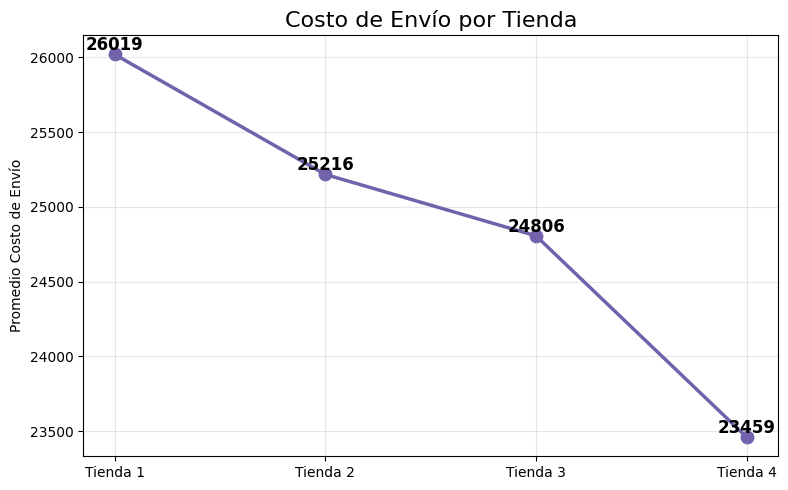

In [270]:
import matplotlib.pyplot as plt
import numpy as np

labels = df_envio_tiendas["Tienda"]
sizes = df_envio_tiendas["Promedio Costo de Envío"]

color_line = plt.cm.Purples(0.7)

plt.figure(figsize=(8,5))

plt.plot(labels, sizes, marker="o", linewidth=2.5, color=color_line)

plt.scatter(labels, sizes, color=color_line, s=80)

plt.title("Costo de Envío por Tienda", fontsize=16)
plt.ylabel("Promedio Costo de Envío")

for x, y in zip(labels, sizes):
    plt.text(
        x, y, f"{y:.0f}",
        ha="center", va="bottom",
        fontsize=12, fontweight="bold"
    )

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Análisis de resultados